# Original Baselines

In this notebook, we define our original baseline experiments and work out how to get all the datasets we worked with into a consistent format. We evaluate the use of a BOW model, TF-IDF, and BM-25 in this notebook, representing the sparse embedding approaches used in this project.

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

DATASET_NAME = "walmart-amazon"

train_catalog_df = pd.read_csv(f"data/{DATASET_NAME}/train_catalog.csv")
train_queries_df = pd.read_csv(f"data/{DATASET_NAME}/train_queries.csv")
val_catalog_df = pd.read_csv(f"data/{DATASET_NAME}/val_catalog.csv")
val_queries_df = pd.read_csv(f"data/{DATASET_NAME}/val_queries.csv")
print(f"Loaded {len(train_catalog_df.index)} Documents")
print(f"Loaded {len(train_queries_df.index)} Judgments")

Loaded 2554 Documents
Loaded 10905 Judgments


In [3]:
train_catalog_df

,catalog_id,id,upc,brand,groupname,text,price,shelfdescr,shortdescr,longdescr,imageurl,orig_shelfdescr,orig_shortdescr,orig_longdescr,modelno,shipweight,dimensions
0,1,14249992,64109216245,Draper,Electronics - General,Draper Infrared Remote Transmitter,58.45,Infrared transmitter. 3-button operation for i...,NaN,DR1143Infrared transmitter. 3-button operation...,http://i.walmartimages.com/i/mp/00/64/10/92/16...,Infrared transmitter. 3-button operation for i...,NaN,DR1143Infrared transmitter. 3-button operation...,121066,2.00,NaN
1,2,10928662,1034383417,Epson,Monitors,Epson 1500 Hours 200W UHE Projector Lamp ELPLP12,438.84,NaN,Epson ELPLP12 Replacement Lamp,EPSON ELPLP12 1500HRS 200V REPL LAMP FOR LAMP ...,http://i.walmartimages.com/i/p/00/01/03/43/83/...,NaN,Epson ELPLP12 Replacement Lamp,EPSON ELPLP12 1500HRS 200V REPL LAMP FOR LAMP ...,ELPLP12,0.95,6.75 x 5.75 x 5.5 inches
2,3,11961447,80844700031,Comprehensive,TV Accessories,Comprehensive Two-Piece 75 Precision BNC Jack ...,59.25,Comprehensive s True 75 connectors eliminate i...,NaN,CH1151Comprehensive s True 75 connectors elimi...,http://i.walmartimages.com/i/mp/00/80/84/47/00...,Comprehensive's True 75 connectors eliminate i...,NaN,CH1151Comprehensive's True 75 connectors elimi...,BJ-2C7559,0.05,NaN
3,4,13044637,79006932160,D-Link,Garden - General,D-Link DCS-1100 Network Camera,99.82,Surveillance Network Camera Built-in Omni-dir...,The D-Link DCS-1100 Network Camera comes with ...,Surveillance Network Camera Built-in Omni-dir...,http://i.walmartimages.com/i/p/00/79/00/69/32/...,<UL><LI>Surveillance/Network Camera</LI><LI>Bu...,The D-Link DCS-1100 Network Camera comes with ...,<UL><LI>Surveillance/Network Camera</LI><LI>Bu...,DCS-1100,NaN,NaN
4,5,13214131,6503081691,StarTech,Electronics - General,StarTech.com RKPW247015 24 Outlet Power Strip,59.00,Fits most 42U racks and equipment cabinets 10...,The StarTech.com RKPW247015 24 Outlet Power St...,24 Outlet Power Strip solution for your rackmo...,http://i.walmartimages.com/i/p/00/06/50/30/81/...,<ul><li>Fits most 42U racks and equipment cabi...,The StarTech.com RKPW247015 24 Outlet Power St...,<ul><li>24 Outlet Power Strip solution for you...,RKPW247015,5.25,72.5 x 2.5 x 1.5 inches
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2549,2550,16360703,5114123170,3M,Stationery &amp; Office Machinery,3M Dry-Erase Board Porcelain 6 x4 Aluminum Frame,579.29,3M Aluminum Frame Porcelain Dry-erase Board Dr...,NaN,TM5788 3M Aluminum Frame Porcelain Dry-erase B...,http://i.walmartimages.com/i/mp/00/05/11/41/23...,3M Aluminum Frame Porcelain Dry-erase Board Dr...,NaN,TM5788<b>3M Aluminum Frame Porcelain Dry-erase...,NaN,42.00,NaN
2550,2551,16553062,89979400511,HTC,Electronics - General,HTC MyTouch 3G White Unlocked,199.00,Android OS v1.5 3.15MP camera Video recording ...,The HTC MyTouch 3G features a Gorilla Glass di...,HTC MyTouch 3G Sound and Music Vibration polyp...,http://i.walmartimages.com/i/p/00/89/97/94/00/...,"<li>Android OS, v1.5<li>3.15MP camera<li>Video...",The HTC MyTouch 3G features a Gorilla Glass di...,<p><b>HTC MyTouch 3G:</b><p><b>Sound and Music...,Mytouch 3G,0.85,4.45 x 2.19 x 0.58 inches
2551,2552,16637140,89807400111,Dell,Printers,Dell Series 2 Color Ink,35.97,Color Color For Dell A940 A960 printers,The Dell Series 2 Color Ink provides consisten...,Dell Series 2 Color Ink Color Color For Dell A...,http://i.walmartimages.com/i/p/00/89/80/74/00/...,"<li>Color: Color<li>For Dell A940, A960 printers",The Dell Series 2 Color Ink provides consisten...,<p><b>Dell Series 2 Color Ink:</b><ul><li>Colo...,330-0048,7.00,5.5 x 3.86 x 1.26 inches
2552,2553,9714616,72286814877,Belkin,Electronics - General,Belkin Pro Series High Integrity Monitor Cable...,7.88,The Belkin Pro Series High Integrity Monitor C...,The Belkin Pro Series High Integrity Monitor C...,Technical Information Cable Type Monitor ...,http://i.walmartimages.com/i/p/00/72/28/68/14/...,The Belkin Pro Series High Integrity Monitor C...,The Belkin 

In [4]:
import numpy.random
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from rank_bm25 import BM25Okapi
from sklearn.feature_extraction.text import CountVectorizer

class RandomRanker:
    def __init__(self):
        pass
    
    def train(self, catalog_df, queries_df):
        pass
    
    def prerun(self, catalog_df):
        pass
    
    def get_score(self, query, catalog_df):
        text = query["input_text"]
        return {
            "scores": np.random.uniform(0,1,size=len(catalog_df))
        }
    
def levenshtein_distance(word1, word2):
    if len(word1) < len(word2):
        return levenshtein_distance(word2, word1)

    if len(word2) == 0:
        return len(word1)

    previous_row = range(len(word2) + 1)

    for i, c1 in enumerate(word1):
        current_row = [i + 1]

        for j, c2 in enumerate(word2):
            insertions = previous_row[j + 1] + 1
            deletions = current_row[j] + 1
            substitutions = previous_row[j] + (c1 != c2)
            current_row.append(min(insertions, deletions, substitutions))

        previous_row = current_row

    return previous_row[-1]
    

def normalized_levenshtein_distance(word1, word2):
    distance = levenshtein_distance(word1, word2)
    max_length = max(len(word1), len(word2))
    return distance / max_length

    
class LevensteinRanker:
    def __init__(self):
        print("Wanring! This is a slow ranker")
        pass
    
    def train(self, catalog_df, queries_df):
        pass
    
    def prerun(self, catalog_df):
        pass
    
    def get_score(self, query, catalog_df):
        text = query["input_text"]
        
        return {
            "scores": catalog_df["text"].apply(lambda x: -normalized_levenshtein_distance(x, text)).values
        }
    
class TfidfRanker:
    def __init__(self):
        self.vectorizer = TfidfVectorizer(token_pattern=r'\b\w+\b', lowercase=True)

    def train(self, catalog_df, queries_df):
        self.vectorizer.fit(catalog_df['text'].str.lower())

    def prerun(self, catalog_df):
        pass
        
    def get_score(self, query, catalog_df):
        text = query["input_text"].lower()
        tfidf_matrix = self.vectorizer.transform(catalog_df['text'].str.lower())
        query_vector = self.vectorizer.transform([text])
        scores = (tfidf_matrix * query_vector.T).toarray()
        return {
            "scores": scores.flatten()
        }
    
class BM25Ranker:
    def __init__(self):
        pass
        
    def train(self, catalog_df, queries_df):
        pass
        
    def prerun(self, catalog_df):
        corpus = catalog_df['text'].str.lower().tolist()
        tokenized_corpus = [doc.split(" ") for doc in corpus]
        self.bm25 = BM25Okapi(tokenized_corpus)

    def get_score(self, query, catalog_df):
        text = query["input_text"].lower()
        query_vector = text.split(" ")
        scores = self.bm25.get_scores(query_vector)
        return {
            "scores": scores
        }
    
tf_idf_ranker = TfidfRanker()
tf_idf_ranker.train(train_catalog_df, train_queries_df)
tf_idf_ranker.prerun(train_catalog_df)
tf_idf_ranker.get_score({"input_text": "Remote"}, train_catalog_df)

bm_25_ranker = BM25Ranker()
bm_25_ranker.train(train_catalog_df, train_queries_df)
bm_25_ranker.prerun(train_catalog_df)
bm_25_ranker.get_score({"input_text": "Remote"}, train_catalog_df)

{'scores': array([8.01605747, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ])}

In [10]:
from tqdm import tqdm

def evaluate(ranker, catalog_df, queries_df):
    ranks = []
    ranker.prerun(catalog_df)
    for i,row in tqdm(queries_df.iterrows(), total=len(queries_df.index)):
        input_query = dict(row)
        target_id = input_query["match_id"]
        judgment = input_query["judgment"]
        
        if judgment == True:
            del input_query["match_id"]
            del input_query["judgment"]
            
            scores = ranker.get_score(input_query, catalog_df)["scores"]
            sorted_catalog = catalog_df.iloc[np.argsort(-scores)]
            rank = np.where(sorted_catalog["catalog_id"].values == target_id)
            rank = rank[0][0] # FIXME: This could file if target_id is not in the catalog_df, in that case, skip
            ranks.append(rank)
          
    ranks = np.array(ranks)
    return {
        "ranks": ranks,
        "top_1": sum(ranks < 1) / len(ranks),
        "top_2": sum(ranks < 2) / len(ranks),
        "top_3": sum(ranks < 3) / len(ranks),
        "top_5": sum(ranks < 5) / len(ranks),
        "top_7": sum(ranks < 7) / len(ranks),
        "top_10": sum(ranks < 10) / len(ranks),
        "top_100": sum(ranks < 100) / len(ranks),
        "top_1000": sum(ranks < 1000) / len(ranks),
    }

print(f'Top 10 Random: {evaluate(RandomRanker(), val_catalog_df, val_queries_df)["top_3"]}')
print(f'Top 10 TF-IDF: {evaluate(tf_idf_ranker, val_catalog_df, val_queries_df)["top_3"]}')
print(f'Top 10 BM-25: {evaluate(bm_25_ranker, val_catalog_df, val_queries_df)["top_3"]}')

100%|██████████| 3131/3131 [00:00<00:00, 10153.84it/s]


Top 10 Random: 0.0


100%|██████████| 3131/3131 [00:04<00:00, 722.36it/s] 


Top 10 TF-IDF: 0.9568965517241379


100%|██████████| 3131/3131 [00:00<00:00, 3234.09it/s]

Top 10 BM-25: 0.9439655172413793


In [6]:
val_catalog_df

,catalog_id,id,upc,brand,groupname,text,price,shelfdescr,shortdescr,longdescr,imageurl,orig_shelfdescr,orig_shortdescr,orig_longdescr,modelno,shipweight,dimensions
0,1,14249992,64109216245,Draper,Electronics - General,Draper Infrared Remote Transmitter,58.45,Infrared transmitter. 3-button operation for i...,NaN,DR1143Infrared transmitter. 3-button operation...,http://i.walmartimages.com/i/mp/00/64/10/92/16...,Infrared transmitter. 3-button operation for i...,NaN,DR1143Infrared transmitter. 3-button operation...,121066,2.00,NaN
1,2,10928662,1034383417,Epson,Monitors,Epson 1500 Hours 200W UHE Projector Lamp ELPLP12,438.84,NaN,Epson ELPLP12 Replacement Lamp,EPSON ELPLP12 1500HRS 200V REPL LAMP FOR LAMP ...,http://i.walmartimages.com/i/p/00/01/03/43/83/...,NaN,Epson ELPLP12 Replacement Lamp,EPSON ELPLP12 1500HRS 200V REPL LAMP FOR LAMP ...,ELPLP12,0.95,6.75 x 5.75 x 5.5 inches
2,3,11961447,80844700031,Comprehensive,TV Accessories,Comprehensive Two-Piece 75 Precision BNC Jack ...,59.25,Comprehensive s True 75 connectors eliminate i...,NaN,CH1151Comprehensive s True 75 connectors elimi...,http://i.walmartimages.com/i/mp/00/80/84/47/00...,Comprehensive's True 75 connectors eliminate i...,NaN,CH1151Comprehensive's True 75 connectors elimi...,BJ-2C7559,0.05,NaN
3,4,13044637,79006932160,D-Link,Garden - General,D-Link DCS-1100 Network Camera,99.82,Surveillance Network Camera Built-in Omni-dir...,The D-Link DCS-1100 Network Camera comes with ...,Surveillance Network Camera Built-in Omni-dir...,http://i.walmartimages.com/i/p/00/79/00/69/32/...,<UL><LI>Surveillance/Network Camera</LI><LI>Bu...,The D-Link DCS-1100 Network Camera comes with ...,<UL><LI>Surveillance/Network Camera</LI><LI>Bu...,DCS-1100,NaN,NaN
4,5,13214131,6503081691,StarTech,Electronics - General,StarTech.com RKPW247015 24 Outlet Power Strip,59.00,Fits most 42U racks and equipment cabinets 10...,The StarTech.com RKPW247015 24 Outlet Power St...,24 Outlet Power Strip solution for your rackmo...,http://i.walmartimages.com/i/p/00/06/50/30/81/...,<ul><li>Fits most 42U racks and equipment cabi...,The StarTech.com RKPW247015 24 Outlet Power St...,<ul><li>24 Outlet Power Strip solution for you...,RKPW247015,5.25,72.5 x 2.5 x 1.5 inches
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2549,2550,16360703,5114123170,3M,Stationery &amp; Office Machinery,3M Dry-Erase Board Porcelain 6 x4 Aluminum Frame,579.29,3M Aluminum Frame Porcelain Dry-erase Board Dr...,NaN,TM5788 3M Aluminum Frame Porcelain Dry-erase B...,http://i.walmartimages.com/i/mp/00/05/11/41/23...,3M Aluminum Frame Porcelain Dry-erase Board Dr...,NaN,TM5788<b>3M Aluminum Frame Porcelain Dry-erase...,NaN,42.00,NaN
2550,2551,16553062,89979400511,HTC,Electronics - General,HTC MyTouch 3G White Unlocked,199.00,Android OS v1.5 3.15MP camera Video recording ...,The HTC MyTouch 3G features a Gorilla Glass di...,HTC MyTouch 3G Sound and Music Vibration polyp...,http://i.walmartimages.com/i/p/00/89/97/94/00/...,"<li>Android OS, v1.5<li>3.15MP camera<li>Video...",The HTC MyTouch 3G features a Gorilla Glass di...,<p><b>HTC MyTouch 3G:</b><p><b>Sound and Music...,Mytouch 3G,0.85,4.45 x 2.19 x 0.58 inches
2551,2552,16637140,89807400111,Dell,Printers,Dell Series 2 Color Ink,35.97,Color Color For Dell A940 A960 printers,The Dell Series 2 Color Ink provides consisten...,Dell Series 2 Color Ink Color Color For Dell A...,http://i.walmartimages.com/i/p/00/89/80/74/00/...,"<li>Color: Color<li>For Dell A940, A960 printers",The Dell Series 2 Color Ink provides consisten...,<p><b>Dell Series 2 Color Ink:</b><ul><li>Colo...,330-0048,7.00,5.5 x 3.86 x 1.26 inches
2552,2553,9714616,72286814877,Belkin,Electronics - General,Belkin Pro Series High Integrity Monitor Cable...,7.88,The Belkin Pro Series High Integrity Monitor C...,The Belkin Pro Series High Integrity Monitor C...,Technical Information Cable Type Monitor ...,http://i.walmartimages.com/i/p/00/72/28/68/14/...,The Belkin Pro Series High Integrity Monitor C...,The Belkin 

In [16]:
res_idf = evaluate(tf_idf_ranker, val_catalog_df, val_queries_df)
res_bm_25 = evaluate(bm_25_ranker, val_catalog_df, val_queries_df)
res_random = evaluate(RandomRanker(), val_catalog_df, val_queries_df)

100%|██████████| 3131/3131 [00:01<00:00, 2910.31it/s]


In [22]:
list(res_idf.values())[1:]

[0.8793103448275862,
 0.9568965517241379,
 0.9827586206896551,
 0.9870689655172413,
 0.9870689655172413,
 1.0,
 1.0]

# Baseline Model Performance

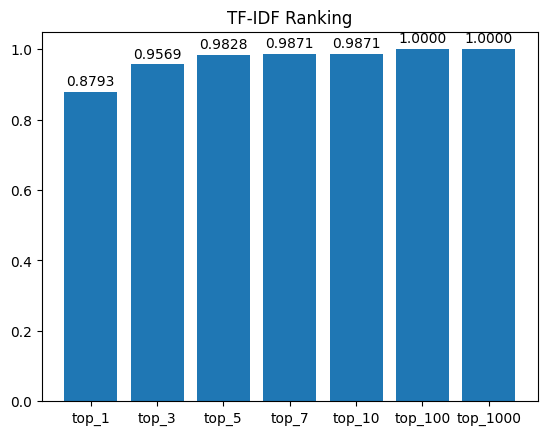

In [35]:
plt.bar(range(len(res_idf)-1), list(res_idf.values())[1:], align='center')
plt.title("TF-IDF Ranking")
plt.xticks(range(len(res_idf)-1), list(res_idf.keys())[1:])

for i, value in enumerate(list(res_idf.values())[1:]):
    plt.text(i, value + 0.01, '%.4f' % value, ha='center', va='bottom')

plt.show()

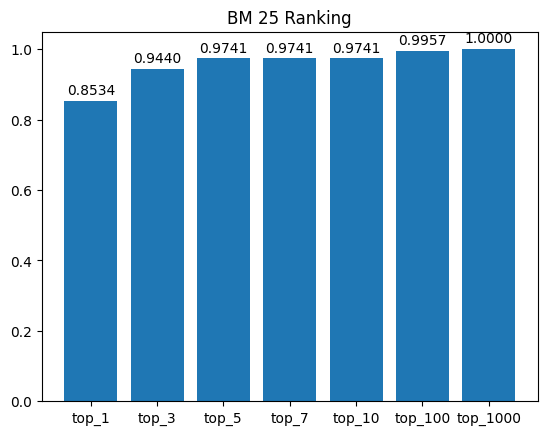

In [36]:
plt.bar(range(len(res_bm_25)-1), list(res_bm_25.values())[1:], align='center')
plt.title("BM 25 Ranking")

plt.xticks(range(len(res_bm_25)-1), list(res_bm_25.keys())[1:])
for i, value in enumerate(list(res_bm_25.values())[1:]):
    plt.text(i, value + 0.01, '%.4f' % value, ha='center', va='bottom')
plt.show()

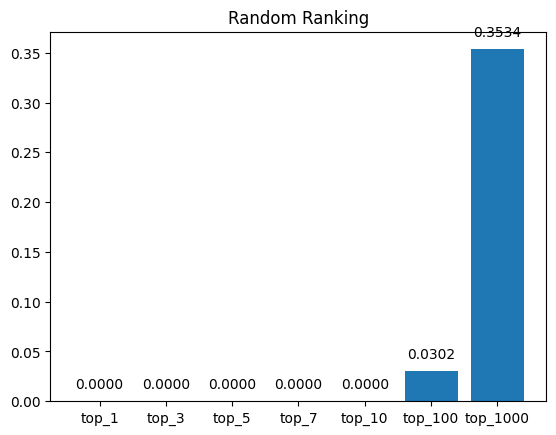

In [37]:
plt.bar(range(len(res_random)-1), list(res_random.values())[1:], align='center')
plt.title("Random Ranking")
plt.xticks(range(len(res_random)-1), list(res_random.keys())[1:])
for i, value in enumerate(list(res_random.values())[1:]):
    plt.text(i, value + 0.01, '%.4f' % value, ha='center', va='bottom')
plt.show()